In [2]:
import numpy as np
from skimage import io
from skimage.transform import resize
from ForwardImaging.util import forward_propagate
import matplotlib.pyplot as plt
import scipy.io as sio
import os

# Generate Multi-focus Intensity Images 

In [3]:
# params setting
d = 0.0005
pixel_num = 512
pixel_size = 5e-6
wavelength = 5e-7

In [9]:
def img_val_scale(img, min_val=0., max_val=1.):
    img = img - img.min()
    img = img / img.max()
    
    img_val_range = max_val - min_val
    img = img * img_val_range + min_val
    return img

In [8]:
# load images
amp_img = resize(io.imread("./data/a.jpg"), (pixel_num, pixel_num))
pha_img = resize(io.imread("./data/b.jpg"), (pixel_num, pixel_num))

# normalization
amp_img = (amp_img - amp_img.min()) / (amp_img - amp_img.min()).max()
pha_img = np.pi * (pha_img - pha_img.min()) / (pha_img - pha_img.min()).max()

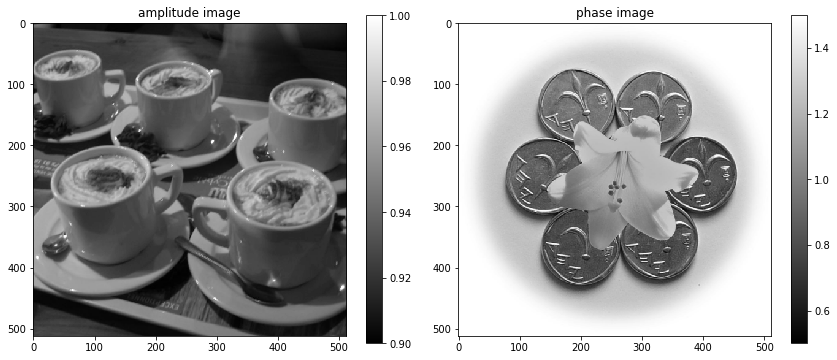

In [11]:
amp_img = img_val_scale(amp_img, 0.9, 1.)
pha_img = img_val_scale(pha_img, 0.5, 1.5)

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(amp_img, cmap="gray")
plt.title("amplitude image")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(pha_img, cmap="gray")
plt.title("phase image")
plt.colorbar()
plt.tight_layout()
plt.show()

In [12]:
# wavefront
wf_init = amp_img * np.exp(1j * pha_img)

# propagating
wf_unfocus = forward_propagate(wf_init, d, wavelength, pixel_num, pixel_size)
wf_defocus = forward_propagate(wf_init, -d, wavelength, pixel_num, pixel_size)
I_unfocus = abs(wf_unfocus * wf_unfocus.conj())
I_defocus = abs(wf_defocus * wf_defocus.conj())
I_infocus = abs(wf_init * wf_init.conj())

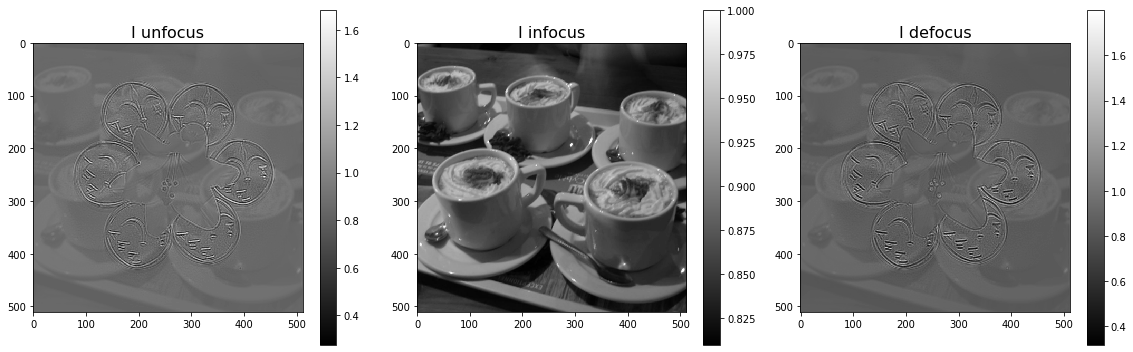

In [13]:
# visualization
name_list = ["I unfocus", "I infocus", "I defocus"]
plt.figure(figsize=[16, 5])
for i, img in enumerate([I_unfocus, I_infocus, I_defocus]):
    plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(name_list[i], fontsize=16)
    plt.colorbar()
plt.tight_layout()
plt.show()

In [14]:
# save as matlab matrix
save_path = "data/exchange_data"
if not os.path.exists(save_path):
    os.mkdir(save_path)

sio.savemat(os.path.join(save_path, "multi_focus_imgs.mat"),
            mdict={
                "wavelength": wavelength,
                "pixel_num": pixel_num,
                "pixel_size": pixel_size,
                "delta_d": d,
                "I_unfocus": I_unfocus,
                "I_infocus": I_infocus,
                "I_defocus": I_defocus
            })